In [1]:
##This code is for validation
import pandas as pd
from nltk import tokenize
import re
from nltk.corpus import stopwords
from nltk import stem
import numpy as np
import math
import random
from sklearn.model_selection import KFold
df_train=pd.read_csv('toxic1.csv')

In [2]:
df_train["comment_text"] = df_train["comment_text"].str.replace("\n","")
df_train = df_train.fillna("")
df_train.head()
#df_train.shape

,Unnamed: 0,Unnamed: 0.1,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,6,6,0002bcb3da6cb337,cocksucker piss around work,1,1,1,0,1,0
1,12,12,0005c987bdfc9d4b,hey @ | talk exclusive group wp talibanswho go...,1,0,0,0,0,0
2,16,16,0007e25b2121310b,bye look come think comming back tosser,1,0,0,0,0,0
3,42,42,001810bf8c45bf5f,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1
4,43,43,00190820581d90ce,fuck filthy mother ass dry,1,0,1,0,1,0


In [31]:
from sklearn.feature_extraction.text import CountVectorizer   
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 10000)

In [32]:
train_data_features = vectorizer.fit_transform(df_train["comment_text"])

In [33]:
#It takes lot of memory though it improve speed of learning 
#train_data_features = train_data_features.toarray()
#Split data into train and validation
#Try to predict toxic or not
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    train_data_features, df_train["toxic"], test_size=0.5, random_state=5)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics as mtr
from tqdm import tqdm
ls = []
forest = RandomForestClassifier(n_estimators = (10 * (i*2)))
forest = forest.fit(X_train, y_train)
result = forest.predict(X_valid)
mtr.roc_auc_score(y_valid,result)

NameError: name 'i' is not defined

In [35]:
#We can also try another model in similar code
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn import metrics as mtr
from tqdm import tqdm
ls = []
nb = MultinomialNB()
#nb = GaussianNB()
#nb = BernoulliNB()
nb = nb.fit(X_train, y_train)
result = nb.predict(X_valid)
mtr.roc_auc_score(y_valid,result)

0.8721540360098932

In [14]:
print(mtr.classification_report(y_valid, result))

             precision    recall  f1-score   support

          0       0.85      0.91      0.88      7959
          1       0.90      0.83      0.87      7665

avg / total       0.88      0.87      0.87     15624



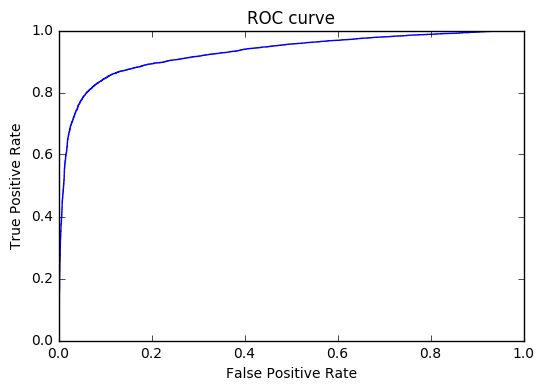

In [16]:
#Probability to calculate ROC curve
prob = nb.predict_proba(X_valid)[:,1]
#fpr:False Positive, tpr: True Positive
#Positive = Toxic comment
fpr, tpr, thresholds = mtr.roc_curve(y_valid, prob)
from matplotlib import pyplot as plt
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [43]:
from sklearn.metrics import confusion_matrix 
import numpy as np
cm = confusion_matrix(y_valid, result)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

[[ 0.85175879  0.14824121]
 [ 0.05506884  0.94493116]]


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
logist = LogisticRegression()
logist = logist.fit(X_train, y_train)
scores = cross_val_score(logist,  train_data_features, df_train["toxic"], cv=5, scoring='accuracy')
print(scores)
print(scores.mean())
result1 = logist.predict(X_valid)

[ 0.89216     0.89296     0.89696     0.88862218  0.89068502]
0.892277439751


In [72]:
from sklearn import metrics as mtr
print(mtr.classification_report(y_valid, result1))

             precision    recall  f1-score   support

          0       0.88      0.91      0.89      7959
          1       0.90      0.87      0.89      7665

avg / total       0.89      0.89      0.89     15624



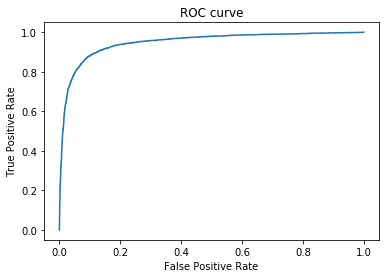

In [73]:
#Probability to calculate ROC curve
prob = logist.predict_proba(X_valid)[:,1]
#fpr:False Positive, tpr: True Positive
#Positive = Toxic comment
fpr, tpr, thresholds = mtr.roc_curve(y_valid, prob)
from matplotlib import pyplot as plt
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [74]:
from sklearn.metrics import confusion_matrix 
import numpy as np
# confusion_matrix(y_valid, result1)
cm = confusion_matrix(y_valid, result1)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

[[ 0.91129539  0.08870461]
 [ 0.13150685  0.86849315]]


In [76]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
svm = SVC()
svm = svm.fit(X_train, y_train)
scores = cross_val_score(svm,  train_data_features, df_train["toxic"], cv=5, scoring='accuracy')
print(scores)
print(scores.mean())
result2 = svm.predict(X_valid)

[ 0.80976     0.81504     0.8112      0.80828933  0.80745839]
0.810349542595


In [77]:
from sklearn import metrics as mtr
print(mtr.classification_report(y_valid, result2))

             precision    recall  f1-score   support

          0       0.73      0.92      0.82      7959
          1       0.88      0.66      0.75      7665

avg / total       0.81      0.79      0.79     15624



In [79]:
from sklearn.metrics import confusion_matrix 
import numpy as np
# confusion_matrix(y_valid, result1)
cm = confusion_matrix(y_valid, result2)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

[[ 0.91669808  0.08330192]
 [ 0.34363992  0.65636008]]
